<img src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=200, height=200>
<h3 style="text-align: center;"><b>Физтех-Школа Прикладной математики и информатики (ФПМИ) МФТИ</b></h3>

---

***Some parts of the notebook are almost the copy of [ mmta-team course](https://github.com/mmta-team/mmta_fall_2020). Special thanks to mmta-team for making them publicly available. [Original notebook](https://github.com/mmta-team/mmta_fall_2020/blob/master/tasks/01_word_embeddings/task_word_embeddings.ipynb).***

<b> Прочитайте семинар, пожалуйста, для успешного выполнения домашнего задания. В конце ноутка напишите свой вывод. Работа без вывода оценивается ниже.

## Задача поиска схожих по смыслу предложений

Мы будем ранжировать вопросы [StackOverflow](https://stackoverflow.com) на основе семантического векторного представления 

До этого в курсе не было речи про задачу ранжировния, поэтому введем математическую формулировку

## Задача ранжирования(Learning to Rank)

* $X$ - множество объектов
* $X^l = \{x_1, x_2, ..., x_l\}$ - обучающая выборка
<br>На обучающей выборке задан порядок между некоторыми элементами, то есть нам известно, что некий объект выборки более релевантный для нас, чем другой:
* $i \prec j$ - порядок пары индексов объектов на выборке $X^l$ c индексами $i$ и $j$
### Задача:
построить ранжирующую функцию $a$ : $X \rightarrow R$ такую, что
$$i \prec j \Rightarrow a(x_i) < a(x_j)$$

<img src="https://d25skit2l41vkl.cloudfront.net/wp-content/uploads/2016/12/Featured-Image.jpg" width=500, height=450>

### Embeddings

Будем использовать предобученные векторные представления слов на постах Stack Overflow.<br>
[A word2vec model trained on Stack Overflow posts](https://github.com/vefstathiou/SO_word2vec)

In [ ]:
!wget https://zenodo.org/record/1199620/files/SO_vectors_200.bin?download=1

--2021-10-11 13:54:05--  https://zenodo.org/record/1199620/files/SO_vectors_200.bin?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1453905423 (1.4G) [application/octet-stream]
Saving to: ‘SO_vectors_200.bin?download=1’

SO_vectors_200.bin? 100%[===================>]   1.35G  16.0MB/s    in 59s     

2021-10-11 13:55:05 (23.5 MB/s) - ‘SO_vectors_200.bin?download=1’ saved [1453905423/1453905423]



In [ ]:
from gensim.models.keyedvectors import KeyedVectors
wv_embeddings = KeyedVectors.load_word2vec_format("SO_vectors_200.bin?download=1", binary=True)

#### Как пользоваться этими векторами?

Посмотрим на примере одного слова, что из себя представляет embedding

In [ ]:
word = 'dog'
if word in wv_embeddings:
    print(wv_embeddings[word].dtype, wv_embeddings[word].shape)

float32 (200,)


In [ ]:
wv_embeddings["dog"]

array([ 0.6851772 , -1.2778991 , -0.41913974,  1.3623164 , -3.1675398 ,
        0.09950767,  0.6402681 , -1.1245339 , -0.6699619 , -0.6998852 ,
        0.4936771 , -0.40500194, -3.0706816 , -2.2809966 ,  0.85798043,
        2.7093108 ,  0.3492745 , -0.03494101, -0.22330493,  1.2290467 ,
        1.7755157 , -3.158358  , -0.6515983 ,  0.7224096 ,  2.3193083 ,
       -1.7969862 ,  0.40903398, -2.744604  , -1.7179952 , -0.914309  ,
       -0.75887376, -0.35140672, -0.5182776 , -1.9097351 , -0.8300773 ,
        0.02147918,  1.1783471 ,  0.03169126, -0.3069023 ,  1.6666299 ,
        0.6711357 , -2.1706133 , -0.11800487,  0.22336982, -1.2075394 ,
       -0.86297905, -0.63865614,  1.1733794 ,  0.10022762,  0.7017279 ,
        2.7290728 , -0.4640484 , -2.1719306 , -0.3562852 , -1.8449957 ,
        0.10270727,  1.1125596 , -0.8364318 ,  1.9513408 , -0.97937447,
        1.2650859 ,  0.06809282,  0.6477318 , -0.52431005, -0.6103959 ,
       -2.979829  , -0.7889965 , -0.11004248,  1.7603841 , -1.05

In [ ]:
print(f"Num of words: {len(wv_embeddings.index2word)}")

Num of words: 1787145


Найдем наиболее близкие слова к слову `dog`:

#### Вопрос 1:
* Входит ли слов `cat` топ-5 близких слов к слову `dog`? Какое место? 

In [ ]:
# method most_simmilar
'''your code'''
wv_embeddings.most_similar(positive="dog", topn=10)

[('animal', 0.8564180135726929),
 ('dogs', 0.7880867123603821),
 ('mammal', 0.7623804807662964),
 ('cats', 0.7621253728866577),
 ('animals', 0.760793924331665),
 ('feline', 0.7392398118972778),
 ('bird', 0.7315489053726196),
 ('animal1', 0.7219215631484985),
 ('doggy', 0.7213349938392639),
 ('labrador', 0.7209131717681885)]

In [ ]:
# "cat" не входит в top-5 близких слов, но входит "cats"

In [ ]:
wv_embeddings.most_similar(positive="dog", topn=30)

[('animal', 0.8564180135726929),
 ('dogs', 0.7880867123603821),
 ('mammal', 0.7623804807662964),
 ('cats', 0.7621253728866577),
 ('animals', 0.760793924331665),
 ('feline', 0.7392398118972778),
 ('bird', 0.7315489053726196),
 ('animal1', 0.7219215631484985),
 ('doggy', 0.7213349938392639),
 ('labrador', 0.7209131717681885),
 ('canine', 0.7209056615829468),
 ('meow', 0.7185295820236206),
 ('cow', 0.7080444693565369),
 ('dog2', 0.7057910561561584),
 ('woof', 0.7050611972808838),
 ('dog1', 0.7038840055465698),
 ('dog3', 0.701882004737854),
 ('penguin', 0.6970292329788208),
 ('bulldog', 0.6940488815307617),
 ('mammals', 0.6931389570236206),
 ('bark', 0.6913799047470093),
 ('fruit', 0.6892251968383789),
 ('reptile', 0.6891210079193115),
 ('furry', 0.6863498687744141),
 ('carnivore', 0.6862949728965759),
 ('cat', 0.6852341294288635),
 ('horse', 0.6833381056785583),
 ('kitten', 0.6820152997970581),
 ('sheep', 0.6802570223808289),
 ('chihuahua', 0.6791757941246033)]

In [ ]:
# cat занимает 26-ое место

### Векторные представления текста

Перейдем от векторных представлений отдельных слов к векторным представлениям вопросов, как к **среднему** векторов всех слов в вопросе. Если для какого-то слова нет предобученного вектора, то его нужно пропустить. Если вопрос не содержит ни одного известного слова, то нужно вернуть нулевой вектор.

In [ ]:
import numpy as np
import re
# you can use your tokenizer
# for example, from nltk.tokenize import WordPunctTokenizer
class MyTokenizer:
    def __init__(self):
        pass
    def tokenize(self, text):
        return re.findall('\w+', text)

In [ ]:
def question_to_vec(question, embeddings, tokenizer, dim=200):
    """
        question: строка
        embeddings: наше векторное представление
        dim: размер любого вектора в нашем представлении
        
        return: векторное представление для вопроса
    """
    
    '''your code'''
    question_embedding = np.zeros(shape=dim)
    num_question_words = 0
    for word in tokenizer.tokenize(text=question.lower()):
        if word in embeddings:
            question_embedding += embeddings[word]
            num_question_words += 1
    if num_question_words:
        return question_embedding / num_question_words
    return question_embedding

Теперь у нас есть метод для создания векторного представления любого предложения.

#### Вопрос 2:
* Какая третья(с индексом 2) компонента вектора предложения `I love neural networks` (округлите до 2 знаков после запятой)?

In [ ]:
example_question = "I love neural networks"

In [ ]:
tokenizer = MyTokenizer()
wv_embeddings

In [ ]:
question_embedding = question_to_vec(example_question, wv_embeddings, tokenizer, dim=200)
question_embedding.shape

(200,)

In [ ]:
round(question_embedding[2], 2)

-1.29

### Оценка близости текстов

Представим, что мы используем идеальные векторные представления слов. Тогда косинусное расстояние между дублирующими предложениями должно быть меньше, чем между случайно взятыми предложениями. 

Сгенерируем для каждого из $N$ вопросов $R$ случайных отрицательных примеров и примешаем к ним также настоящие дубликаты. Для каждого вопроса будем ранжировать с помощью нашей модели $R + 1$ примеров и смотреть на позицию дубликата. Мы хотим, чтобы дубликат был первым в ранжированном списке.

#### Hits@K
Первой простой метрикой будет количество корректных попаданий для какого-то $K$:
$$ \text{Hits@K} = \frac{1}{N}\sum_{i=1}^N \, [rank\_q_i^{'} \le K],$$
* $\begin{equation*}
[x < 0 ] \equiv 
 \begin{cases}
   1, &x < 0\\
   0, &x \geq 0
 \end{cases}
\end{equation*}$ - индикаторная функция
* $q_i$ - $i$-ый вопрос
* $q_i^{'}$ - его дубликат
* $rank\_q_i^{'}$ - позиция дубликата в ранжированном списке ближайших предложений для вопроса $q_i$.

#### DCG@K
Второй метрикой будет упрощенная DCG метрика, учитывающая порядок элементов в списке путем домножения релевантности элемента на вес равный обратному логарифму номера позиции::
$$ \text{DCG@K} = \frac{1}{N} \sum_{i=1}^N\frac{1}{\log_2(1+rank\_q_i^{'})}\cdot[rank\_q_i^{'} \le K],$$
С такой метрикой модель штрафуется за большой ранк корректного ответа

#### Вопрос 3:
* Максимум `Hits@47 - DCG@1`?

In [ ]:
# Рассуждения по данному вопросу:
# Чтобы максимизировать разницу, первое слагаемое должно стремиться к максимально возможному своему значению, а второе слагаемое наоборот должно стремиться к минимально возможному своему значению

# max(Hits@47) = 1, если для каждого запроса ранг его дубликата <= 47, что вполне реализуемо чисто теоретически.
# min(DCG@1) = 0, если для каждого запроса ранг его дубликата > 1, что также вполне реализуемо теоретически

# Тогда, при условии ранжирования так, что выполняются условия выше -> max(Hits@47 - DCG@1) = 1

<img src='https://hsto.org/files/1c5/edf/dee/1c5edfdeebce4b71a86bdf986d9f88f2.jpg' width=400, height=200>

#### Пример оценок

Вычислим описанные выше метрики для игрушечного примера. 
Пусть
* $N = 1$, $R = 3$
* <font color='green'>"Что такое python?"</font> - вопрос $q_1$
* <font color='red'>"Что такое язык python?"</font> - его дубликат $q_i^{'}$

Пусть модель выдала следующий ранжированный список кандидатов:

1. "Как изучить с++?"
2. <font color='red'>"Что такое язык python?"</font>
3. "Хочу учить Java"
4. "Не понимаю Tensorflow"

$\Rightarrow rank\_q_i^{'} = 2$

Вычислим метрику *Hits@K* для *K = 1, 4*:

- [K = 1] $\text{Hits@1} =  [rank\_q_i^{'} \le 1)] = 0$
- [K = 4] $\text{Hits@4} =  [rank\_q_i^{'} \le 4] = 1$

Вычислим метрику *DCG@K* для *K = 1, 4*:
- [K = 1] $\text{DCG@1} = \frac{1}{\log_2(1+2)}\cdot[2 \le 1] = 0$
- [K = 4] $\text{DCG@4} = \frac{1}{\log_2(1+2)}\cdot[2 \le 4] = \frac{1}{\log_2{3}}$

#### Вопрос 4:
* Вычислите `DCG@10`, если $rank\_q_i^{'} = 9$(округлите до одного знака после запятой)

In [ ]:
import math

In [ ]:
# 1/log2(1 + 9) * [9 <= 10]

round(1 / math.log(1 + 9, 2), 1)

0.3

### HITS\_COUNT и DCG\_SCORE

Каждая функция имеет два аргумента: $dup\_ranks$ и $k$. $dup\_ranks$ является списком, который содержит рейтинги дубликатов(их позиции в ранжированном списке). Например, $dup\_ranks = [2]$ для примера, описанного выше.

In [ ]:
def hits_count(dup_ranks, k):
    """
        dup_ranks: list индексов дубликатов
        result: вернуть  Hits@k
    """
    '''your code'''
    hits_value = 0
    for dup_rank in dup_ranks:
        if dup_rank <= k:
            hits_value += 1
    return hits_value  / len(dup_ranks)   

In [ ]:
import math

In [ ]:
def dcg_score(dup_ranks, k):
    """
        dup_ranks: list индексов дубликатов
        result: вернуть DCG@k
    """
    '''your code'''
    dcg_value = 0
    for dup_rank in dup_ranks:
        if dup_rank <= k:
            dcg_value += 1 / math.log(1 + dup_rank, 2)
    return dcg_value / len(dup_ranks)

Протестируем функции. Пусть $N = 1$, то есть один эксперимент. Будем искать копию вопроса и оценивать метрики.

In [ ]:
import pandas as pd

In [ ]:
copy_answers = ["How does the catch keyword determine the type of exception that was thrown"]

# наги кандидаты
candidates_ranking = [["How Can I Make These Links Rotate in PHP",
                       "How does the catch keyword determine the type of exception that was thrown",
                       "NSLog array description not memory address",
                       "PECL_HTTP not recognised php ubuntu"],]



# вспомогательная ф-я для нахождения ранга дибликата
def find_dup_ranks(candidates, copy_answer):
    for i, candidate in enumerate(candidates, 1):
        if candidate == copy_answer:
            return i

# dup_ranks — позиции наших копий, так как эксперимент один, то этот массив длины 1
dup_ranks = [find_dup_ranks(sentence, copy_answers[i]) for i, sentence in enumerate(candidates_ranking)]

# вычисляем метрику для разных k
print('Ваш ответ HIT:', [hits_count(dup_ranks, k) for k in range(1, 5)])
print('Ваш ответ DCG:', [round(dcg_score(dup_ranks, k), 5) for k in range(1, 5)])

Ваш ответ HIT: [0.0, 1.0, 1.0, 1.0]
Ваш ответ DCG: [0.0, 0.63093, 0.63093, 0.63093]


У вас должно получиться

In [ ]:
# correct_answers - метрика для разных k
correct_answers = pd.DataFrame([[0, 1, 1, 1], [0, 1 / (np.log2(3)), 1 / (np.log2(3)), 1 / (np.log2(3))]],
                               index=['HITS', 'DCG'], columns=range(1,5))
correct_answers

,1,2,3,4
HITS,0,1.00000,1.00000,1.00000
DCG,0,0.63093,0.63093,0.63093


### Данные
[arxiv link](https://drive.google.com/file/d/1QqT4D0EoqJTy7v9VrNCYD-m964XZFR7_/edit)

`train.tsv` - выборка для обучения.<br> В каждой строке через табуляцию записаны: **<вопрос>, <похожий вопрос>**

`validation.tsv` - тестовая выборка.<br> В каждой строке через табуляцию записаны: **<вопрос>, <похожий вопрос>, <отрицательный пример 1>, <отрицательный пример 2>, ...**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/stackoverflow_similar_questions.zip

Archive:  /content/drive/MyDrive/stackoverflow_similar_questions.zip
   creating: data/
  inflating: data/.DS_Store          
   creating: __MACOSX/
   creating: __MACOSX/data/
  inflating: __MACOSX/data/._.DS_Store  
  inflating: data/train.tsv          
  inflating: data/validation.tsv     


In [ ]:
ls -la

total 1419864
drwxr-xr-x 1 root root       4096 Oct 11 14:04  ./
drwxr-xr-x 1 root root       4096 Oct 11 13:52  ../
drwxr-xr-x 4 root root       4096 Sep 30 17:11  .config/
drwxr-xr-x 2 root root       4096 Oct 26  2018  data/
drwx------ 6 root root       4096 Oct 11 14:04  drive/
drwxrwxr-x 3 root root       4096 Sep 22  2019  __MACOSX/
drwxr-xr-x 1 root root       4096 Sep 30 17:12  sample_data/
-rw-r--r-- 1 root root 1453905423 Oct  3 01:07 'SO_vectors_200.bin?download=1'


Считайте данные.

In [ ]:
def read_corpus(filename):
    data = []
    for line in open(filename, encoding='utf-8'):
        data.append(line.strip().split("\t"))
    
    return data

Нам понадобиться только файл validation.

In [ ]:
validation_data = read_corpus('./data/validation.tsv')

In [ ]:
validation_data[1][-10:] # .strip() позволил избавиться от /n

['setGraphic() not working correctly on recursively created TreeItems',
 'Strange behaviour of sscanf with string',
 'HTTP method for a WCF Restful Service',
 'SubSonic .Filter() in memory filter',
 'Does ASP.NET MVC use the regular toolbox controls?',
 'How can I render a GSP as a String?',
 'publishing ASP.Net MVC 4 Project',
 'how to hyperlink to a TFS item from visual studio',
 'mutex attribute PTHREAD_PROCESS_SHARED inverts logic?',
 'Unable to call SOAP Webservice using jQuery']

Кол-во строк

In [ ]:
len(validation_data)

3760

Размер нескольких первых строк

In [ ]:
for i in range(5):
    print(i + 1, len(validation_data[i]))

1 1001
2 1001
3 1001
4 1001
5 1001


### Ранжирование без обучения

Реализуйте функцию ранжирования кандидатов на основе косинусного расстояния. Функция должна по списку кандидатов вернуть отсортированный список пар (позиция в исходном списке кандидатов, кандидат). При этом позиция кандидата в полученном списке является его рейтингом (первый - лучший). Например, если исходный список кандидатов был [a, b, c], и самый похожий на исходный вопрос среди них - c, затем a, и в конце b, то функция должна вернуть список **[(2, c), (0, a), (1, b)]**.

In [ ]:
import pandas as pd

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from copy import deepcopy

In [ ]:
def rank_candidates(question, candidates, embeddings, tokenizer, dim=200):
    """
        question: строка
        candidates: массив строк(кандидатов) [a, b, c]
        result: пары (начальная позиция, кандидат) [(2, c), (0, a), (1, b)]
    """
    '''your code'''

    question_embedding = [question_to_vec(question, embeddings, tokenizer, dim)]
    candidates_embeddings = [question_to_vec(candidate, embeddings, tokenizer, dim) for candidate in candidates]

    cos_similarity = pd.Series(cosine_similarity(X=question_embedding, Y=candidates_embeddings).squeeze()).sort_values(ascending=False)
    #print(cos_similarity)

    return [(i, candidates[i]) for i in cos_similarity.index]

Протестируйте работу функции на примерах ниже. Пусть $N=2$, то есть два эксперимента

In [ ]:
questions = ['converting string to list', 'Sending array via Ajax fails'] 

candidates = [['Convert Google results object (pure js) to Python object', # первый эксперимент
               'C# create cookie from string and send it',
               'How to use jQuery AJAX for an outside domain?'],
              
              ['Getting all list items of an unordered list in PHP',      # второй эксперимент
               'WPF- How to update the changes in list item of a list',
               'select2 not displaying search results']]

In [ ]:
print(tokenizer)
print(wv_embeddings)

In [ ]:
for question, q_candidates in zip(questions, candidates):
        ranks = rank_candidates(question, q_candidates, wv_embeddings, tokenizer)
        print(ranks)
        print()

[(1, 'C# create cookie from string and send it'), (0, 'Convert Google results object (pure js) to Python object'), (2, 'How to use jQuery AJAX for an outside domain?')]

[(1, 'WPF- How to update the changes in list item of a list'), (0, 'Getting all list items of an unordered list in PHP'), (2, 'select2 not displaying search results')]



Для первого экперимента вы можете полностью сравнить ваши ответы и правильные ответы. Но для второго эксперимента два ответа на кандидаты будут <b>скрыты</b>(*)

In [ ]:
# должно вывести
results = [[(1, 'C# create cookie from string and send it'),
            (0, 'Convert Google results object (pure js) to Python object'),
            (2, 'How to use jQuery AJAX for an outside domain?')],
           [(*, 'Getting all list items of an unordered list in PHP'), #скрыт
            (*, 'select2 not displaying search results'), #скрыт
            (*, 'WPF- How to update the changes in list item of a list')]] #скрыт

SyntaxError: ignored

Последовательность начальных индексов вы должны получить `для эксперимента 1`  1, 0, 2.

#### Вопрос 5:
* Какую последовательность начальных индексов вы получили `для эксперимента 2`(перечисление без запятой и пробелов, например, `102` для первого эксперимента?

In [ ]:
# 102

Теперь мы можем оценить качество нашего метода. Запустите следующие два блока кода для получения результата. Обратите внимание, что вычисление расстояния между векторами занимает некоторое время (примерно 10 минут). Можете взять для validation 1000 примеров.

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, wv_embeddings, tokenizer)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [ ]:
for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.415 | Hits@   1: 0.415
DCG@   5: 0.502 | Hits@   5: 0.582
DCG@  10: 0.524 | Hits@  10: 0.650
DCG@ 100: 0.570 | Hits@ 100: 0.874
DCG@ 500: 0.583 | Hits@ 500: 0.973
DCG@1000: 0.586 | Hits@1000: 1.000


In [ ]:
# ниже можно увидеть результат, если не использовать .lower()

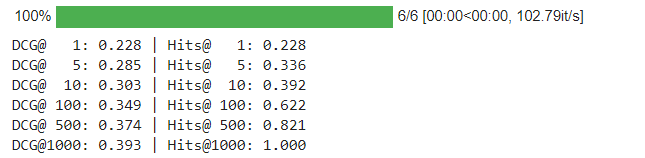

### Эмбеддинги, обученные на корпусе похожих вопросов

In [ ]:
train_data = read_corpus('./data/train.tsv')
train_data[1]

['Which HTML 5 Canvas Javascript to use for making an interactive drawing tool?',
 'Event handling for geometries in Three.js?']

In [ ]:
train_data[:5]

[['converting string to list',
  'Convert Google results object (pure js) to Python object'],
 ['Which HTML 5 Canvas Javascript to use for making an interactive drawing tool?',
  'Event handling for geometries in Three.js?'],
 ['Sending array via Ajax fails',
  'Getting all list items of an unordered list in PHP'],
 ['How to insert CookieCollection to CookieContainer?',
  'C# create cookie from string and send it'],
 ['Updating one element of a bound Observable collection',
  'WPF- How to update the changes in list item of a list']]

In [ ]:
len(train_data)

1000000

Улучшите качество модели.<br>Склеим вопросы в пары и обучим на них модель Word2Vec из gensim. Выберите размер window. Объясните свой выбор.

In [ ]:
tokenizer = MyTokenizer()

In [ ]:
words = [list(tokenizer.tokenize(" ".join(corpus))) for corpus in train_data]

In [ ]:
len(words)

1000000

In [ ]:
words[0]

['converting',
 'string',
 'to',
 'list',
 'Convert',
 'Google',
 'results',
 'object',
 'pure',
 'js',
 'to',
 'Python',
 'object']

In [ ]:
# Посмотрим на пример работы обученного нами Word2Vec

In [ ]:
from gensim.models import Word2Vec
embeddings_trained = Word2Vec(words,                     # data for model to train on
                              size=200,                  # embedding vector size
                              min_count=5, # consider words that occured at least 5 times
                              window=5).wv

In [ ]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, embeddings_trained, tokenizer)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [ ]:
for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.267 | Hits@   1: 0.267
DCG@   5: 0.335 | Hits@   5: 0.396
DCG@  10: 0.357 | Hits@  10: 0.463
DCG@ 100: 0.411 | Hits@ 100: 0.732
DCG@ 500: 0.436 | Hits@ 500: 0.922
DCG@1000: 0.444 | Hits@1000: 1.000


In [ ]:
# ниже также представлен результат, если не использовать .lower()

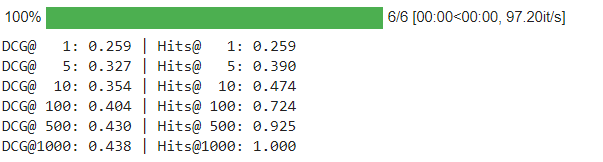

In [ ]:
# Попробуем подобрать более оптимальное значение размера окна

In [126]:
# Посмотрим на распределение кол-ва слов в документах
from collections import Counter

words_count = Counter({i: len(word_i) for i, word_i in enumerate(words)})
count = [val for val in words_count.values()]

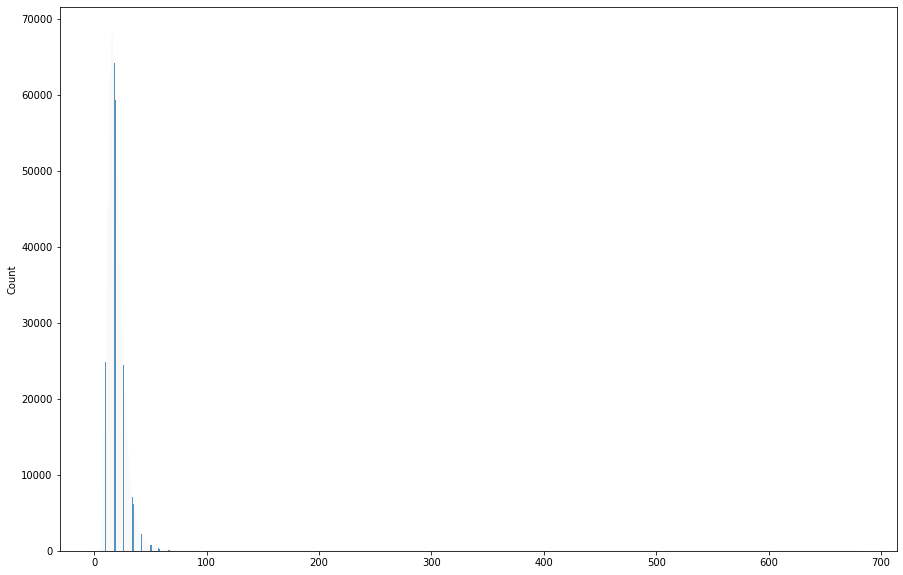

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)

sns.histplot(data=count);

In [ ]:
# кол-во слов в предложении в основном около 10 - 30, поэтому размер окна может быть около 20 или даже больше

In [130]:
# зададим размер окон, которые рассмотрим
window_size = [5, 10, 15, 20, 30]

for window in window_size:

    embeddings_trained = Word2Vec(words,                     # data for model to train on
                                  size=200,                  # embedding vector size
                                  min_count=5, # consider words that occured at least 5 times
                                  window=window).wv
    wv_ranking = []
    max_validation_examples = 1000
    for i, line in enumerate(tqdm(validation_data)):
        if i == max_validation_examples:
            break
        q, *ex = line
        ranks = rank_candidates(q, ex, embeddings_trained, tokenizer)
        wv_ranking.append([r[0] for r in ranks].index(0) + 1)
    
    print("window_size: {}".format(window))
    for k in tqdm([1, 5, 10, 100, 500, 1000]):
        print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))
    print()

  0%|          | 0/3760 [00:00<?, ?it/s]

window_size: 5


  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.265 | Hits@   1: 0.265
DCG@   5: 0.335 | Hits@   5: 0.398
DCG@  10: 0.357 | Hits@  10: 0.467
DCG@ 100: 0.410 | Hits@ 100: 0.732
DCG@ 500: 0.434 | Hits@ 500: 0.919
DCG@1000: 0.443 | Hits@1000: 1.000



  0%|          | 0/3760 [00:00<?, ?it/s]

window_size: 10


  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.279 | Hits@   1: 0.279
DCG@   5: 0.355 | Hits@   5: 0.422
DCG@  10: 0.374 | Hits@  10: 0.480
DCG@ 100: 0.427 | Hits@ 100: 0.743
DCG@ 500: 0.450 | Hits@ 500: 0.923
DCG@1000: 0.458 | Hits@1000: 1.000



  0%|          | 0/3760 [00:00<?, ?it/s]

window_size: 15


  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.287 | Hits@   1: 0.287
DCG@   5: 0.361 | Hits@   5: 0.429
DCG@  10: 0.379 | Hits@  10: 0.488
DCG@ 100: 0.432 | Hits@ 100: 0.747
DCG@ 500: 0.455 | Hits@ 500: 0.924
DCG@1000: 0.463 | Hits@1000: 1.000



  0%|          | 0/3760 [00:00<?, ?it/s]

window_size: 20


  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.295 | Hits@   1: 0.295
DCG@   5: 0.368 | Hits@   5: 0.437
DCG@  10: 0.387 | Hits@  10: 0.495
DCG@ 100: 0.437 | Hits@ 100: 0.739
DCG@ 500: 0.461 | Hits@ 500: 0.924
DCG@1000: 0.469 | Hits@1000: 1.000



  0%|          | 0/3760 [00:00<?, ?it/s]

window_size: 30


  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.292 | Hits@   1: 0.292
DCG@   5: 0.370 | Hits@   5: 0.441
DCG@  10: 0.392 | Hits@  10: 0.510
DCG@ 100: 0.438 | Hits@ 100: 0.737
DCG@ 500: 0.462 | Hits@ 500: 0.927
DCG@1000: 0.470 | Hits@1000: 1.000



In [ ]:
# как можно заметить, лучшим вариантом оказалось окно размером = 20

### Замечание:
Решить эту задачу с помощью обучения полноценной нейронной сети будет вам предложено, как часть задания в одной из домашних работ по теме "Диалоговые системы".

Напишите свой вывод о полученных результатах.
* Какой принцип токенизации даёт качество лучше и почему?
* Помогает ли нормализация слов?
* Какие эмбеддинги лучше справляются с задачей и почему?
* Почему получилось плохое качество решения задачи?
* Предложите свой подход к решению задачи.

## Вывод:


Чтобы ответить на поставленные вопросы, проведём дополнительные действия.

А именно:

1) Воспользуемся nltk токенайзером

2) Применим лемматизация или стемминг + стоп слова



In [ ]:
# создаём токенизатор на основе nltk word_tokenize

In [ ]:
import nltk
nltk.download("punkt")
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
class NLTK_Tokenizer():
    def __init__(self, word_tokenize=None, stopWords=False, lemmatizer=False):
        if word_tokenize is None:
            import nltk
            word_tokenize = nltk.tokenize.word_tokenize
        self.word_tokenize = word_tokenize

        if stopWords:
            import nltk
            nltk.download('stopwords')

            from nltk.corpus import stopwords
            stopWords = set(stopwords.words('english'))
        self.stopWords = stopWords

        if lemmatizer:
            import nltk
            nltk.download('wordnet')
            
        self.lemmatizer = nltk.WordNetLemmatizer()

    def tokenize(self, text):
        if self.stopWords and self.lemmatizer:
            return [self.lemmatizer.lemmatize(word) for word in self.word_tokenize(text.lower()) if word not in self.stopWords]
        elif selt.stopWords:
            return [word for word in self.word_tokenize(text.lower()) if word not in self.stopWords]
        elif self.lemmatizer:
            return [self.lemmatizer.lemmatize(word) for word in self.word_tokenize(text.lower())]
        return self.word_tokenize(text.lower())

In [ ]:
nltk_tokenizer = NLTK_Tokenizer()

In [ ]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, wv_embeddings, nltk_tokenizer)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [ ]:
for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.399 | Hits@   1: 0.399
DCG@   5: 0.487 | Hits@   5: 0.566
DCG@  10: 0.509 | Hits@  10: 0.634
DCG@ 100: 0.554 | Hits@ 100: 0.858
DCG@ 500: 0.569 | Hits@ 500: 0.969
DCG@1000: 0.573 | Hits@1000: 1.000


In [ ]:
# посмотрим на токенизатор + лемматизатор + стоп слова

In [ ]:
nltk_tokenizer_v1 = NLTK_Tokenizer(stopWords=True)
nltk_tokenizer_v2 = NLTK_Tokenizer(lemmatizer=True, stopWords=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


In [ ]:
# добавляем стоп слова

In [ ]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, wv_embeddings, nltk_tokenizer_v1)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [ ]:
for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.392 | Hits@   1: 0.392
DCG@   5: 0.482 | Hits@   5: 0.565
DCG@  10: 0.503 | Hits@  10: 0.630
DCG@ 100: 0.549 | Hits@ 100: 0.856
DCG@ 500: 0.563 | Hits@ 500: 0.965
DCG@1000: 0.567 | Hits@1000: 1.000


In [ ]:
# стоп-слова + лемматризатор

In [101]:
wv_ranking = []
max_validation_examples = 1000
for i, line in enumerate(tqdm(validation_data)):
    if i == max_validation_examples:
        break
    q, *ex = line
    ranks = rank_candidates(q, ex, wv_embeddings, nltk_tokenizer_v2)
    wv_ranking.append([r[0] for r in ranks].index(0) + 1)

  0%|          | 0/3760 [00:00<?, ?it/s]

In [102]:
for k in tqdm([1, 5, 10, 100, 500, 1000]):
    print("DCG@%4d: %.3f | Hits@%4d: %.3f" % (k, dcg_score(wv_ranking, k), k, hits_count(wv_ranking, k)))

  0%|          | 0/6 [00:00<?, ?it/s]

DCG@   1: 0.392 | Hits@   1: 0.392
DCG@   5: 0.482 | Hits@   5: 0.565
DCG@  10: 0.503 | Hits@  10: 0.630
DCG@ 100: 0.549 | Hits@ 100: 0.856
DCG@ 500: 0.563 | Hits@ 500: 0.965
DCG@1000: 0.567 | Hits@1000: 1.000


In [103]:
# Как можно заметить, качество ранжирования на предобученных эмбеддингах при условии нормализации и nltk токенайзера
# слегка ухудщулось, что наводит на мысль, что словарь предобученных эмбеддингов настолько широк, что включает в себя многие отфильтрованные нами слова
# и в данном случае этого делать не надо 

In [ ]:
# С данной задачей ранжирования лучше справились предобученные эмбеддинги
# Возможно, структура каждого документа, полученная с помощью train.tsv, не является достаточной в том смысле, что взяты всего лишь 2 вопроса
# А пройдясь по 2м вопросам и подсчистав необходимые метрики, этого может оказаться недостаточным.... всё таки всего лишь 2 предложения ... по моему мнению
# этого недостаточно

# Поэтому, для обучения своих эмбеддингов, каждый их документов должен содержать большее кол-во информации...
# К примеру можно увеличить кол-во ближайших по смыслу вопросов с помощью и на них уже обучать Word2Vec